# Disable GPU (if needed)

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Minimal example - Keras API

[2017-11-28 21:48:22,254][ INFO][keras.py]::Feature map shape: (None, 23, 23, 64)
[2017-11-28 21:48:22,255][ INFO][keras.py]::Input shape      : (None, 64, 64, 3)
[2017-11-28 21:48:22,398][DEBUG][base.py]::Computing RF at center (11, 11) with offset GridPoint(x=0, y=0)
[2017-11-28 21:48:22,568][DEBUG][base.py]::Computing RF at center (11, 11) with offset GridPoint(x=1, y=1)
[2017-11-28 21:48:22,666][DEBUG][base.py]::Estimated RF params: ReceptiveFieldDescription(offset=(10.0, 10.0), stride=(2.0, 2.0), size=Size(w=20, h=20))


ReceptiveFieldDescription(offset=(10.0, 10.0), stride=(2.0, 2.0), size=Size(w=20, h=20))


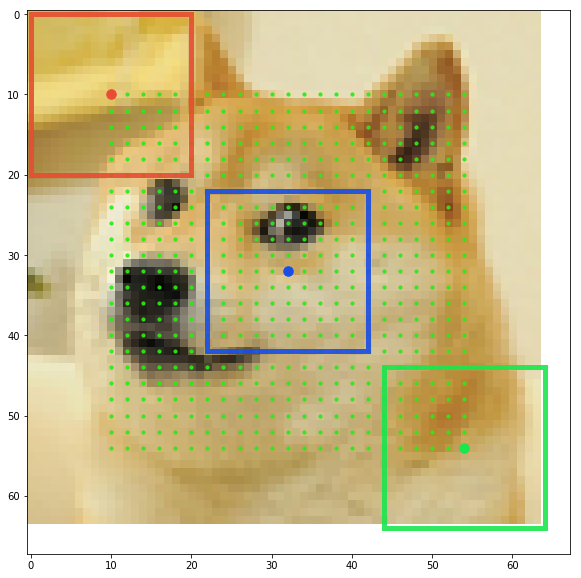

In [2]:
from keras.layers import Activation, Conv2D, Input
from keras.layers import AvgPool2D
from keras.models import Model
from receptivefield.image import get_default_image
from receptivefield.keras import KerasReceptiveField
%matplotlib inline
import matplotlib.pyplot as plt

# define model function
def model_build_func(input_shape):
    act = 'linear' # see Remarks
    inp = Input(shape=input_shape, name='input_image')
    x = Conv2D(32, (7, 7), activation=act)(inp)
    x = Conv2D(32, (5, 5), activation=act)(x)
    x = AvgPool2D()(x)
    x = Conv2D(64, (5, 5), activation=act, name='feature_grid')(x)
    x = AvgPool2D()(x)
    model = Model(inp, x)
    return model

shape = [64, 64, 3]
# compute receptive field
rf = KerasReceptiveField(model_build_func)
rf_params = rf.compute(shape, 'input_image', 'feature_grid')
# debug receptive field
rf.plot_rf_grid(get_default_image(shape, name='doge'))
plt.savefig("../img/demo_minimal.jpg", dpi=126)
print(rf_params)